In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from my_modules.load_data import MyDataset
train_index_movie = [i for i in range(38)]
test_index_movie = [i for i in range(len(train_index_movie),40)]

data_path = r'C:\Users\rakna\Desktop\AIT_working\AIT_CP_Project\this_folder_git_ignore\ori_datasets\s01.dat'
window_size = 145*10
step_window = 10

data_train = MyDataset(data_path,window_size,step_window,train_index_movie,do_noise=True)
data_test = MyDataset(data_path,window_size,step_window,test_index_movie)

In [3]:
fs = 8064//55
ds = 1/fs

In [4]:


sample_signal = data_train[1][0][1]
sample_signal 

tensor([-6.1610, -9.9708, -8.7118,  ..., -3.3810, -4.3660, -1.0126])

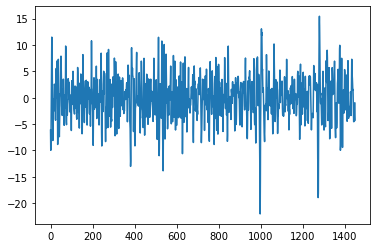

In [5]:
plt.plot(sample_signal)

torch.Size([1450])
(1450,)


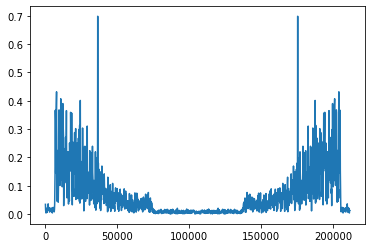

In [6]:
def fft(signal,delta_time):
    fourier_transform = np.fft.fft(sample_signal)/len(sample_signal)
    fourier_transform = np.abs(fourier_transform[:fourier_transform.size])
#     fourier_transform = np.abs(fourier_transform[:fourier_transform.size//2])
    frequency_series = np.arange(fourier_transform.shape[0])/delta_time
    return frequency_series,fourier_transform

output = fft(sample_signal,ds)
print(sample_signal.shape)
print(output[1].shape)
plt.plot(output[0],output[1])
plt.show()

In [7]:
import torch
x = torch.randn(4, 3, 2)
torch.fft(x, 2)

tensor([[[ 0.3040,  6.0754],
         [ 4.1809,  6.0527],
         [ 4.9932, -5.9481]],

        [[ 2.3045, -3.8699],
         [-5.4898,  0.9252],
         [-4.0881, -0.8288]],

        [[ 2.8430, -1.5489],
         [ 5.9863,  1.8342],
         [ 0.3930,  2.6019]],

        [[ 0.8710,  0.0669],
         [ 7.0898, -2.3869],
         [ 2.7903,  5.6841]]])

torch.Size([1450])


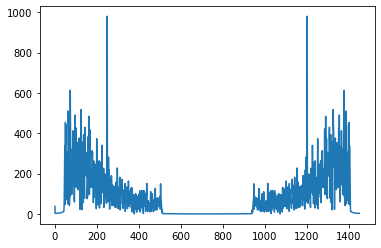

In [8]:
import torch

d = [data_train[0][0],data_train[1][0],data_train[2][0]]
data_set =torch.cat( [torch.unsqueeze(e,0) for e in d] ,0)

output = torch.rfft(data_set,1,onesided =False)

print( ((output[0,0,:,0]**2+output[0,0,:,1]**2)**(0.5)).shape)
plt.plot( (output[0,0,:,0]**2+output[0,0,:,1]**2)**(0.5) )

torch.Size([1450])
torch.Size([73, 41, 2])
tensor([[[ 1.1377e+01,  0.0000e+00],
         [-1.8379e+01,  0.0000e+00],
         [-6.8677e+00,  0.0000e+00],
         ...,
         [-3.0351e+01,  0.0000e+00],
         [-8.6235e+00,  0.0000e+00],
         [ 1.2700e+01,  0.0000e+00]],

        [[ 2.8073e+01,  6.0833e-01],
         [-8.4926e+00,  7.5185e+00],
         [-2.8571e+00,  1.5246e+00],
         ...,
         [-2.6920e+01,  4.3512e-01],
         [-1.1751e+01,  1.0496e+01],
         [-3.2387e+00, -4.2392e-01]],

        [[ 1.6819e+01,  7.2925e-01],
         [-2.4579e+00,  3.1686e+00],
         [-2.9639e+00,  3.3553e+00],
         ...,
         [-2.9056e+01,  1.2707e+00],
         [-2.7124e+01,  9.1643e+00],
         [ 1.4972e+01, -1.7648e+01]],

        ...,

        [[ 3.2183e-03,  5.9380e-02],
         [ 4.5027e+00, -3.5136e-01],
         [ 8.2315e-01,  8.3943e-02],
         ...,
         [ 5.6540e-02,  1.7455e-01],
         [ 1.2705e+00, -1.2239e-01],
         [-4.6225e+00,  9.6031

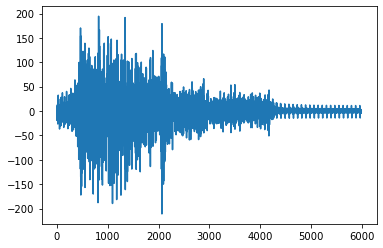

In [9]:
input_stft = data_set[0,0,:]
print(input_stft.shape)
output = torch.stft(input_stft,n_fft=145)
print(output.shape)
print(output)
plt.plot(output.flatten())